# BRAIN TUMOR PREDICTION

# Import Libraries

In [1]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#---------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
def train_df(tr_path):
    classes = []
    class_paths = []
    files = os.listdir(tr_path)
    for file in files:
        label_dir = os.path.join(tr_path, file)
        label = os.listdir(label_dir)
        for image in label:
            image_path = os.path.join(label_dir, image)
            class_paths.append(image_path)
            classes.append(file)
    image_classes = pd.Series(classes, name='Class')
    image_paths = pd.Series(class_paths, name='Class Path')
    tr_df = pd.concat([image_paths, image_classes], axis=1)
    return tr_df

In [3]:
def test_df(ts_path):
    classes = []
    class_paths = []
    files = os.listdir(ts_path)
    for file in files:
        label_dir = os.path.join(ts_path, file)
        label = os.listdir(label_dir)
        for image in label:
            image_path = os.path.join(label_dir, image)
            class_paths.append(image_path)
            classes.append(file)
    image_classes = pd.Series(classes, name='Class')
    image_paths = pd.Series(class_paths, name='Class Path')
    ts_df = pd.concat([image_paths, image_classes], axis=1)
    return ts_df

In [4]:
tr_df = train_df(r"../Dataset/Brain-tumor/Training")


In [5]:
tr_df

,Class Path,Class
0,../Dataset/Brain-tumor/Training\glioma\Tr-glTr...,glioma
1,../Dataset/Brain-tumor/Training\glioma\Tr-glTr...,glioma
2,../Dataset/Brain-tumor/Training\glioma\Tr-glTr...,glioma
3,../Dataset/Brain-tumor/Training\glioma\Tr-glTr...,glioma
4,../Dataset/Brain-tumor/Training\glioma\Tr-glTr...,glioma
...,...,...
5707,../Dataset/Brain-tumor/Training\pituitary\Tr-p...,pituitary
5708,../Dataset/Brain-tumor/Training\pituitary\Tr-p...,pituitary
5709,../Dataset/Brain-tumor/Training\pituitary\Tr-p...,pituitary
5710,../Dataset/Brain-tumor/Training\pituitary\Tr-p...,pituitary


In [6]:
ts_df = test_df(r'../Dataset/Brain-tumor/Testing')


In [7]:
ts_df

,Class Path,Class
0,../Dataset/Brain-tumor/Testing\glioma\Te-glTr_...,glioma
1,../Dataset/Brain-tumor/Testing\glioma\Te-glTr_...,glioma
2,../Dataset/Brain-tumor/Testing\glioma\Te-glTr_...,glioma
3,../Dataset/Brain-tumor/Testing\glioma\Te-glTr_...,glioma
4,../Dataset/Brain-tumor/Testing\glioma\Te-glTr_...,glioma
...,...,...
1306,../Dataset/Brain-tumor/Testing\pituitary\Te-pi...,pituitary
1307,../Dataset/Brain-tumor/Testing\pituitary\Te-pi...,pituitary
1308,../Dataset/Brain-tumor/Testing\pituitary\Te-pi...,pituitary
1309,../Dataset/Brain-tumor/Testing\pituitary\Te-pi...,pituitary


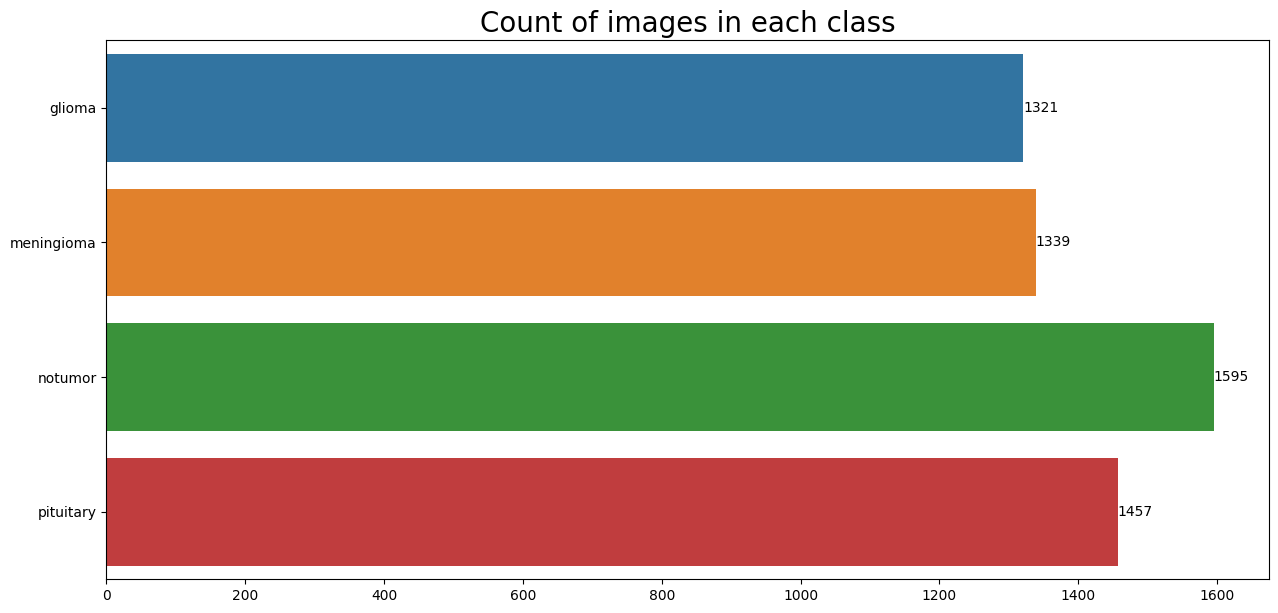

In [8]:
# Count of images in each class
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

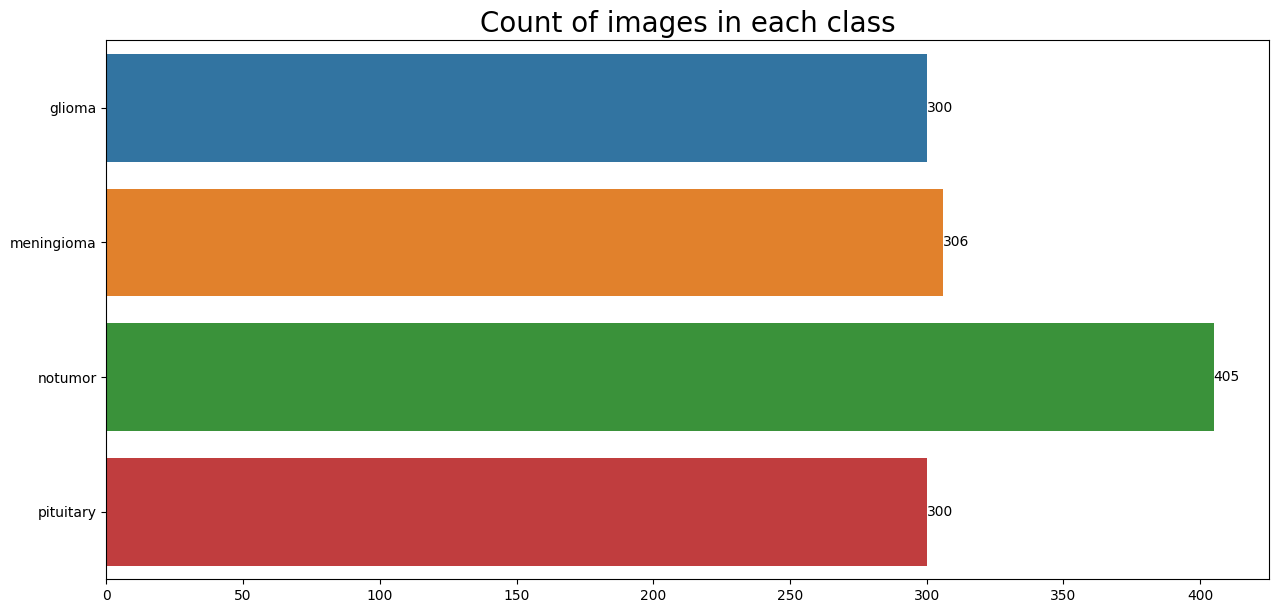

In [9]:
# Count of images in each class
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df , y=ts_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

In [10]:
valid_df, ts_df = train_test_split(ts_df, train_size=.5, random_state=20)

In [11]:
valid_df

,Class Path,Class
464,../Dataset/Brain-tumor/Testing\meningioma\Te-m...,meningioma
988,../Dataset/Brain-tumor/Testing\notumor\Te-no_0...,notumor
565,../Dataset/Brain-tumor/Testing\meningioma\Te-m...,meningioma
503,../Dataset/Brain-tumor/Testing\meningioma\Te-m...,meningioma
502,../Dataset/Brain-tumor/Testing\meningioma\Te-m...,meningioma
...,...,...
1242,../Dataset/Brain-tumor/Testing\pituitary\Te-pi...,pituitary
924,../Dataset/Brain-tumor/Testing\notumor\Te-no_0...,notumor
1247,../Dataset/Brain-tumor/Testing\pituitary\Te-pi...,pituitary
271,../Dataset/Brain-tumor/Testing\glioma\Te-gl_02...,glioma


## Data Preprocessing

In [12]:
batch_size = 16
img_size = (299,299)

tr_gen = ImageDataGenerator(brightness_range=(.8,1.2))

gen = ImageDataGenerator()


tr_gen = tr_gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                 y_col='Class',batch_size=batch_size,
                                 target_size=img_size)

valid_gen = gen.flow_from_dataframe(valid_df, x_col='Class Path',
                                    y_col='Class',batch_size=batch_size,
                                    target_size=img_size)

ts_gen = gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                y_col='Class',batch_size=batch_size,
                                 target_size=img_size,shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [13]:
#gen.flow_from_dataframe?

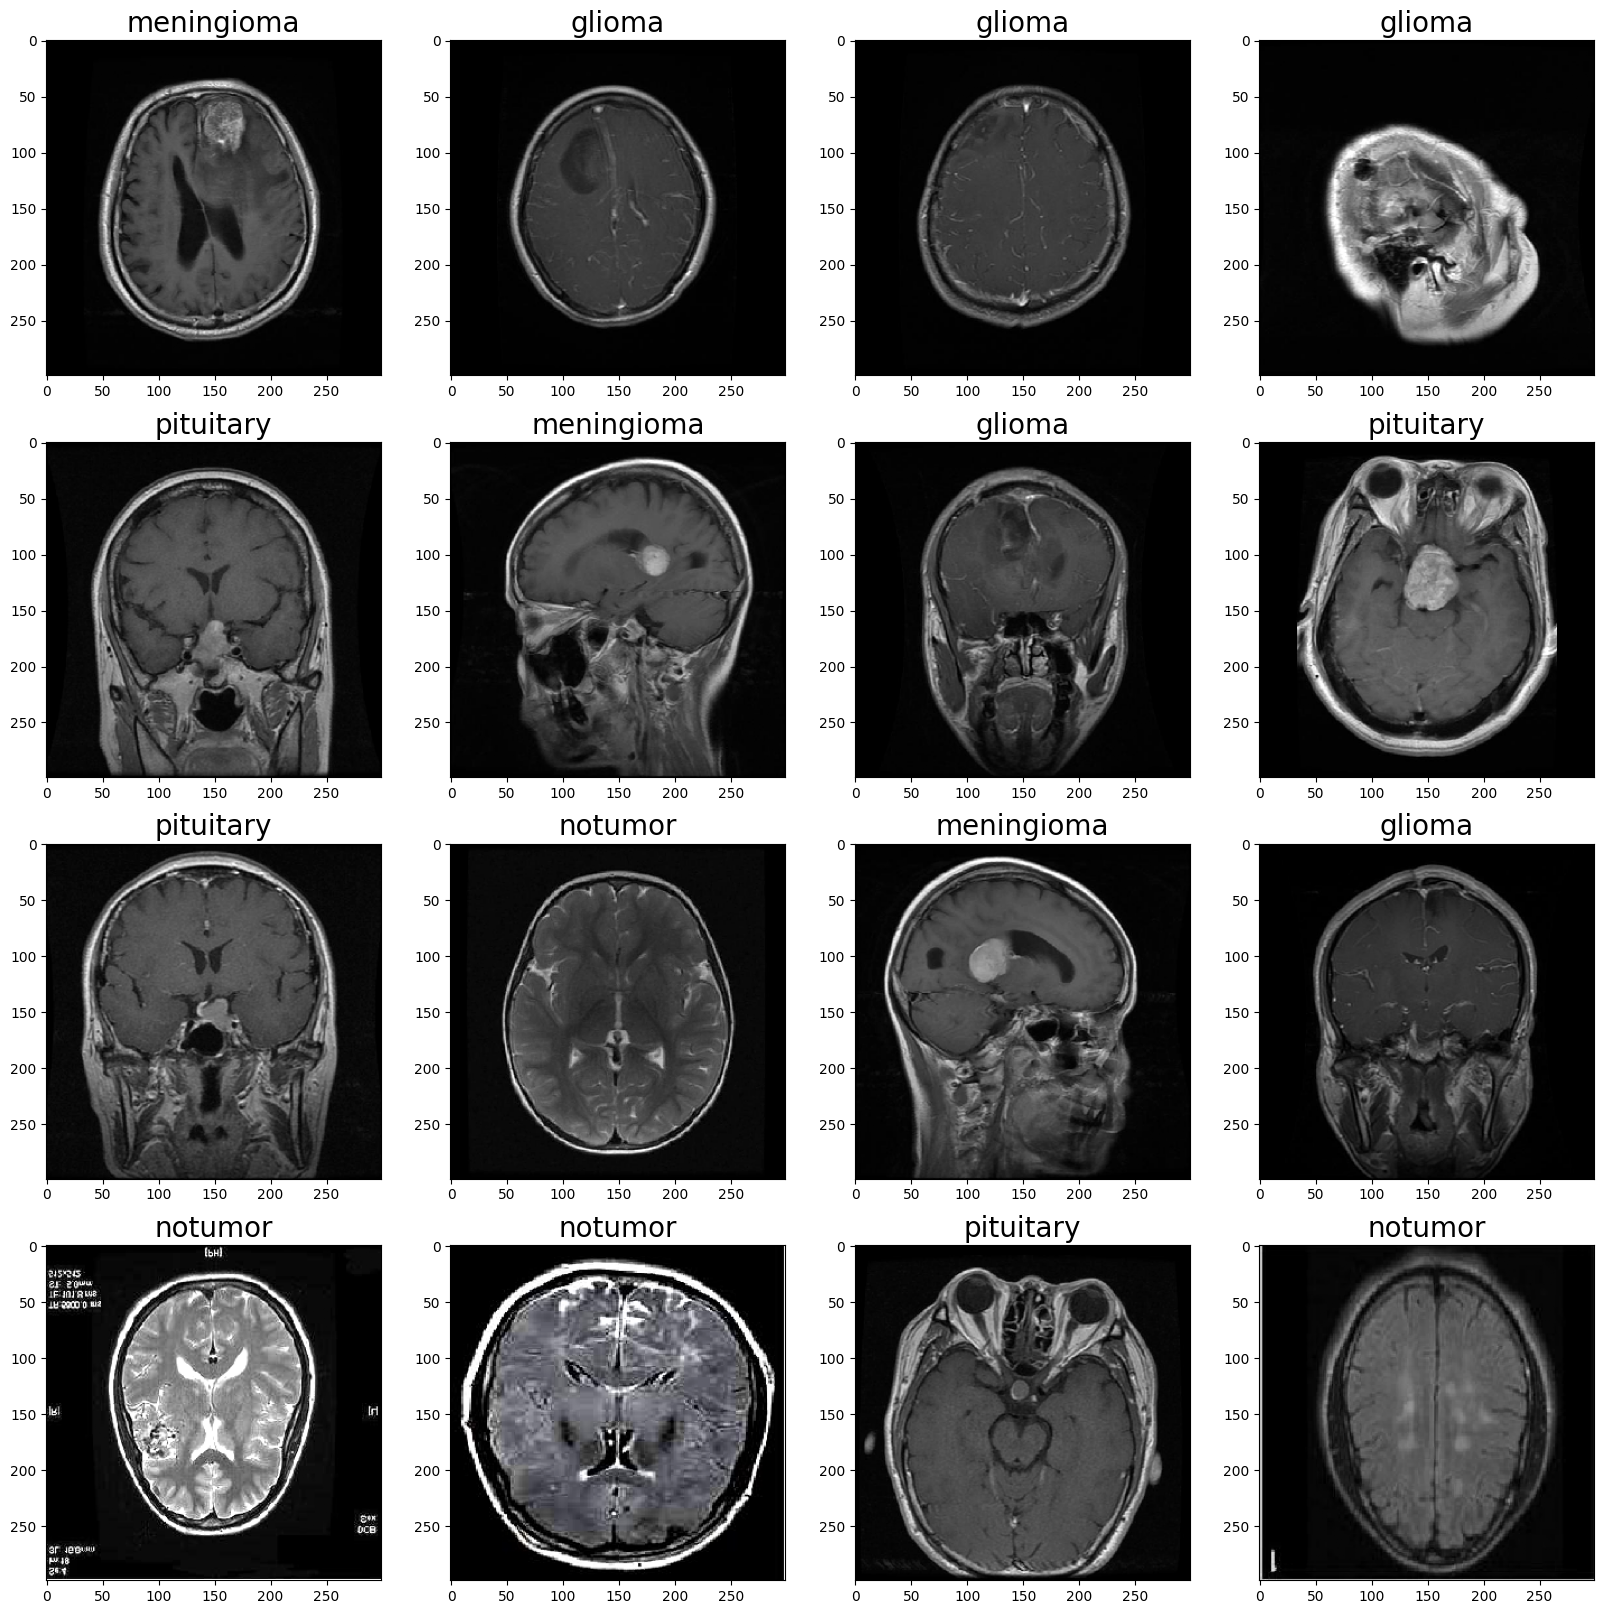

In [13]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(tr_gen)

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color='k', fontsize=20)
plt.show()

## Building Deep learning Models

In [14]:
img_shape=(299,299,3)
base_model = tf.keras.applications.Xception(include_top= False, weights= "imagenet",
                            input_shape= img_shape, pooling= 'max')

# for layer in base_model.layers:
#     layer.trainable = False
    
model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate= 0.3),
    Dense(128, activation= 'relu'),
    Dropout(rate= 0.25),
    Dense(4, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        Precision(),
                        Recall()])

model.summary()

83683744/83683744 [==============================] - 74s 1us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                        

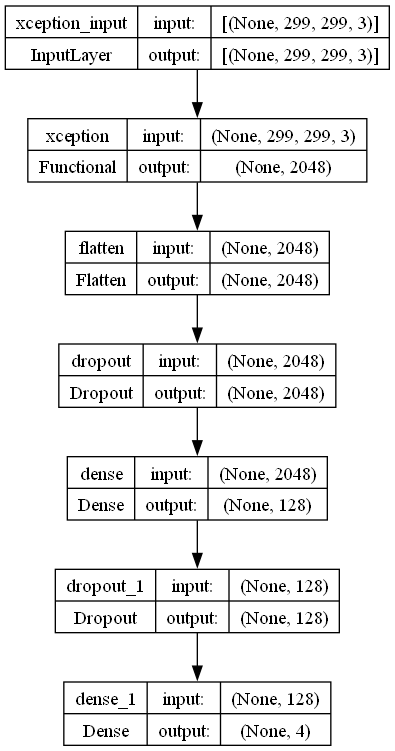

In [16]:
tf.keras.utils.plot_model(model, show_shapes=True)

## Training

In [15]:
model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')  # Change the number of neurons to match your number of classes
])

model.compile(Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',  # Change the loss function
              metrics=['accuracy', Precision(), Recall()])


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator
tr_gen = ImageDataGenerator(brightness_range=(0.8, 1.2))

# Use flow_from_dataframe on the generator
tr_data_gen = tr_gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                         y_col='Class', batch_size=batch_size,
                                         target_size=img_size, class_mode='categorical')

valid_gen = gen.flow_from_dataframe(valid_df, x_col='Class Path',
                                    y_col='Class', batch_size=batch_size,
                                    target_size=img_size, class_mode='categorical')

ts_gen = gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                y_col='Class', batch_size=batch_size,
                                target_size=img_size, class_mode='categorical', shuffle=False)


Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [17]:
hist = model.fit(tr_gen,
                 epochs=15,
                 validation_data=valid_gen,
                 shuffle= False)

ValueError: Failed to find data adapter that can handle input: <class 'keras.src.preprocessing.image.ImageDataGenerator'>, <class 'NoneType'>